In [167]:
# import pandas as pd
import pandas as pd
# import numpy as np
import numpy as np
#import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl

### Dataset
El dataset que se muestra corresponde ana muestra de cancer de mama de un hospital, en la cual se realizo la tomas de datos a pacientes de adultas y adultas mayores de un hospital en Estados Unidos

In [241]:
Breast_Cancer= pd.read_csv('Breast_Cancer.csv')
Breast_Cancer.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

### Graficos con matplotlib

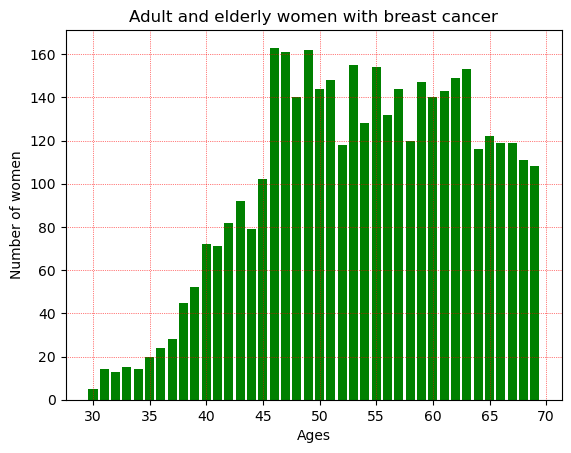

In [242]:
# Aca busco ver  la edad en el cancer de seni para el adulto y adulto mayor
ages_breast=Breast_Cancer['Age']#extraigo la columna 
ages_breastlist= ages_breast.to_numpy().tolist()#convierto a lista
ages_breast=dict(zip(ages_breastlist,map(lambda x: ages_breastlist.count(x),ages_breastlist)))#hago un conteo de las edades y lo paso a un diccionario
# se separa en lista para garficar
ages=ages_breast.keys()
cantidad_mujeres=ages_breast.values()
#Grafica
fig, ax = plt.subplots()
ax.bar(ages,cantidad_mujeres,color='g')
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
ax.set_title('Adult and elderly women with breast cancer')
ax.set_ylabel('Number of women')
ax.set_xlabel('Ages')
plt.show()

([<matplotlib.patches.Wedge at 0x2b9fcf40340>,
 [Text(-0.9772057341700596, 0.5050435160509985, 'White'),
  Text(0.8220024410815, -0.7309664745089581, 'Black'),
  Text(1.065850349391204, -0.27196145444281034, 'Other')],
 [Text(-0.5330213095473052, 0.27547828148236275, '84.8 %'),
  Text(0.4483649678626363, -0.3987089860957953, '7.2 %'),
  Text(0.5813729178497475, -0.14834261151426015, '8.0 %')])

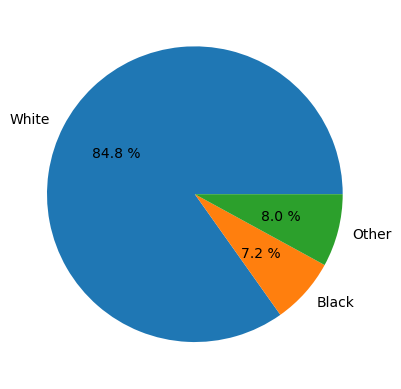

In [170]:
race_breast=Breast_Cancer['Race']#extraigo la columna 
race_breastlist= race_breast.to_numpy().tolist()#convierto a lista
race_breast=dict(zip(race_breastlist,map(lambda x: race_breastlist.count(x),race_breastlist)))

Race=race_breast.keys()
num=race_breast.values()

fig,ax = plt.subplots()
ax.pie(num, labels = Race,autopct="%0.1f %%")

Text(0, 0.5, 'Tumor size (mm)')

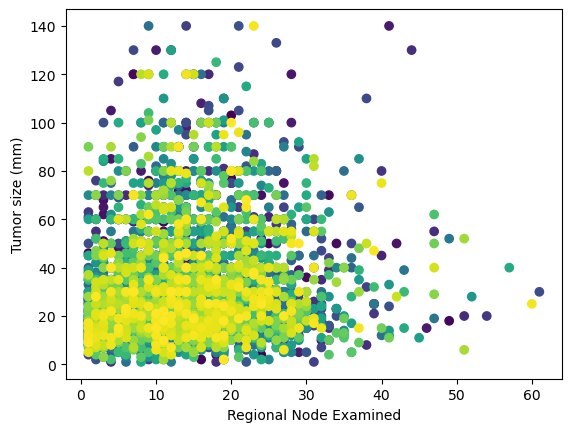

In [175]:
fig, ax = plt.subplots()  
colors_mapping = ax.scatter(Breast_Cancer['Regional Node Examined'], Breast_Cancer['Tumor Size'], c=Breast_Cancer.index)
ax.set_title('')
ax.set_xlabel('Regional Node Examined')
ax.set_ylabel('Tumor size (mm)')

### Interpretación de las gráficas
El gráfico de barras nos muestra que la mayor presencia de cáncer de pecho esta en las edades después de los 45 años.
El gráfico de tortas muestra que la mayoría de mujeres pertenecía a raza blanca que es la etnia predominante en Estados Unidos, mostrando casos más frecuentes para ellas.

En el gráfico de dispersión nos muestran que la tendencia de los puntos es a tamaños menores de 60 mm para los nódulos de cáncer que fueron examinados en las pacientes.

### Gráficos usando searborn

[Text(0.5, 0, 'Size(mm)'),
 Text(0, 0.5, 'cancerous lymph nodes'),
 Text(0.5, 1.0, 'Tumor size related to N stage')]

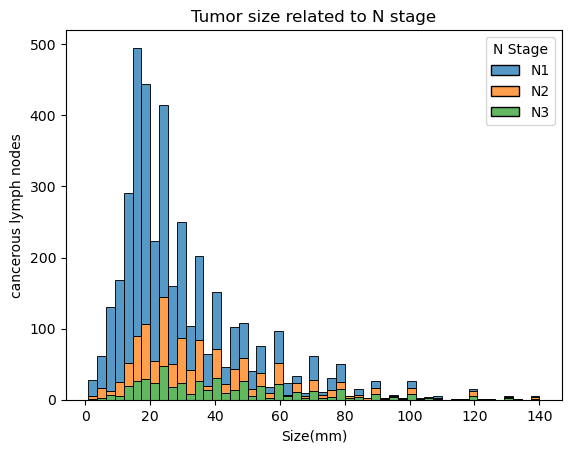

In [201]:
import seaborn as sns
ax=sns.histplot(data=Breast_Cancer, x="Tumor Size", hue="N Stage", multiple="stack")
ax.set(xlabel='Size(mm)', ylabel='cancerous lymph nodes', title='Tumor size related to N stage')

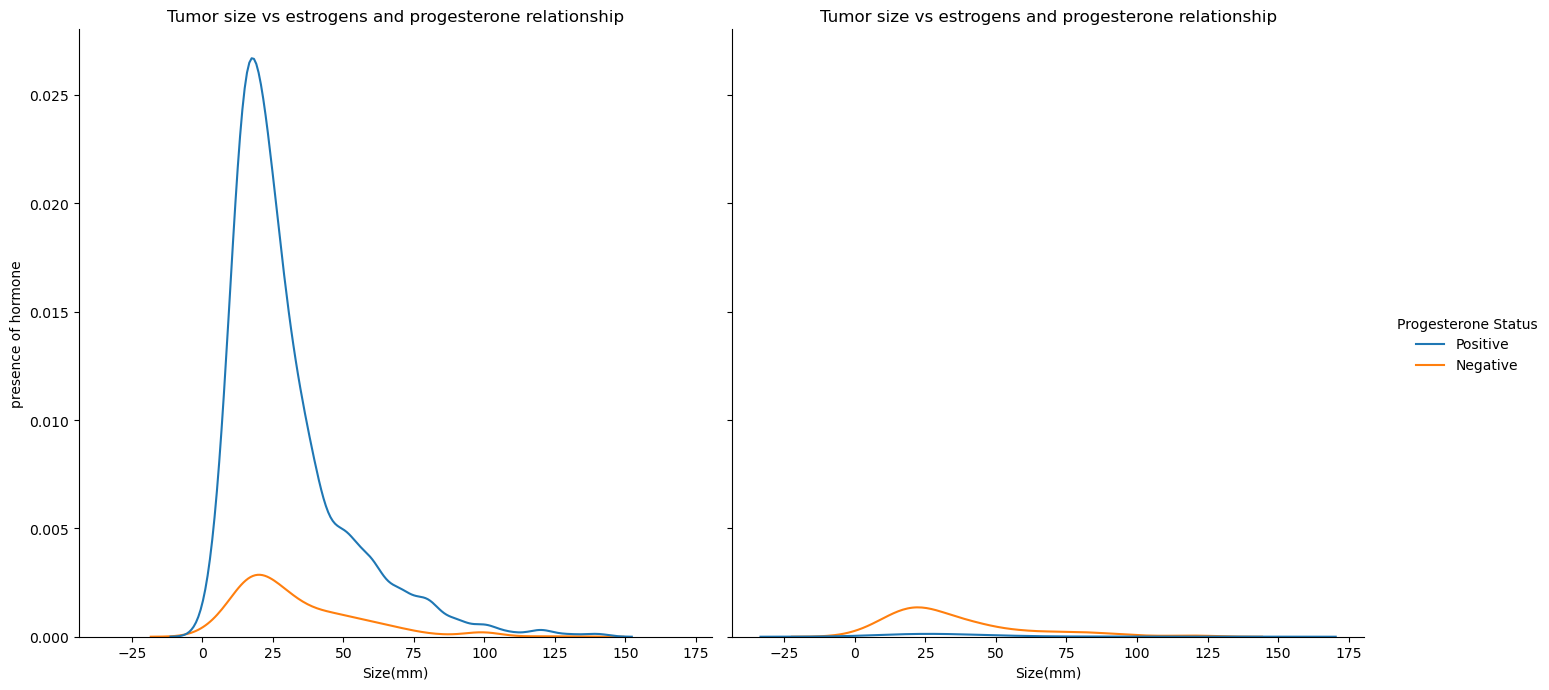

In [228]:
axP = sns.displot(data=Breast_Cancer, x='Tumor Size',kind='kde', hue='Progesterone Status',col="Estrogen Status",height=7)
axP.set(xlabel='Size(mm)', ylabel='presence of hormone', title='Tumor size vs estrogens and progesterone relationship')

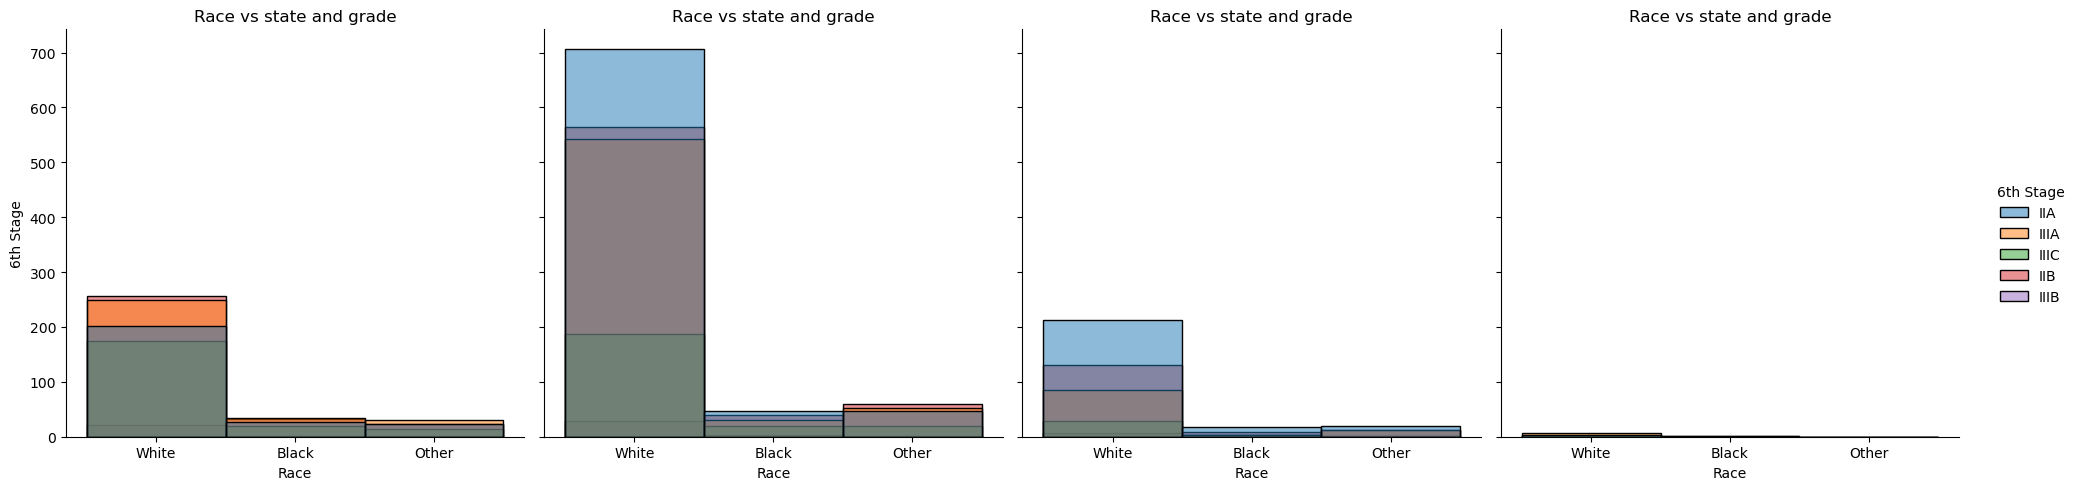

In [240]:
ax=sns.displot(data=Breast_Cancer,x="Race",hue='6th Stage',col="Grade")
ax.set(xlabel='Race', ylabel='6th Stage', title='Race vs state and grade')

### Analisis
El primer gráfico nos permite analizar que los ganglios linfáticos que son cancerosos, están más presentes en los tumores más pequeños

La segunda observamos que los tumores se ven afectados por el nivel de los estrógenos y la progesterona, debido a que a mayor presencia de estrógenos, menor será la presencia de progesterona, pero no hay una relación con el amaño, es decir que estas hormonas no alteran significativamente el tamaño de los tumores.

por último vemos que en las mujeres de raza blanca hay un mayor grado de afectación del tumor , sin embargo en etapas no tan avanzadas
